## Mathematics of Machine Learning

### Chapter 3: Linear classification methods
### Section 3.5: Kernel SVM Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import svm
from sklearn.metrics import accuracy_score


#### (0) Data Preparation

In [47]:
# Load data
x = np.genfromtxt("data_KSVM_X.csv", delimiter=',')
y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')

# print(x)
# print(x.shape)
# print(y)
# print(y.shape)

[[ 1.5089    -1.2421     0.77944   -0.63601    2.08      -1.1195
   2.0787     1.4511    -0.062955   1.4188     0.87296    1.6465
   0.96494    1.2225     0.87191    1.0742    -0.64231   -1.3615
   1.0293     2.0509     0.0049774  1.3121    -1.0025     0.032345
   1.0875    -0.6459     0.87039   -1.274      2.089      0.59107
   1.2551     0.27383    1.8136     0.43886   -1.1528     1.6129
   1.5071     1.9671    -0.96362    0.71418   -0.34336    0.59106
   1.9188     1.2788    -0.22822   -1.4466     0.37319    1.986
   0.52529   -1.7024    -1.1013    -0.50514   -1.0874    -0.69811
   1.0069     0.052166  -0.83409   -1.1405     0.40337   -1.4373
  -1.3234    -1.7315     1.5192    -1.4123    -0.71052   -0.024345
  -1.0226    -1.1678     1.7272     0.44944    1.6621    -0.34619
  -0.14277   -0.79034   -1.0144    -0.080932   1.8609     0.21346
  -0.39912   -0.27301    1.371     -0.78323   -1.3642     2.0182
   0.55083   -0.81088    1.5348    -1.5779     0.84646    0.84098
   0.43804    1.

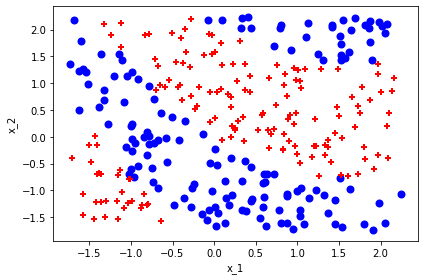

In [4]:
# Plot the training data

fig, ax = plt.subplots()

indp = [i for (i, val) in enumerate(y) if val == 1]
indm = [i for (i, val) in enumerate(y) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2)

plt.xlabel("x_1")
plt.ylabel("x_2")

fig.tight_layout()

#### (1) Soft Kernel SVM rule (Gaussian kernel)

In [5]:
# Lambda for Soft Rule
m = len(y)
lam = 0.5/m

print(m)
print(lam)

300
0.0016666666666666668


In [6]:
# Scaling parameter
kappa = 4

#### gamma == kappa ####

https://scikit-learn.org/stable/modules/svm.html 
1.4.6 Kernel functions

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

https://scikit-learn.org/stable/modules/svm.html 
1.4.7 Mathematical formulation

In [7]:
# Create a support vector classifier
KSVM = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=kappa)

# Learn on the train subset
KSVM.fit(x.T, y)

SVC(gamma=4)

In [8]:
# Get support vectors
support_vectors = KSVM.support_vectors_

#### (2) Plot the learned hypothesis

In [9]:
# Generate discretization grid
x_min = -1.75
x_max = 2.25
y_min = -1.75
y_max = 2.25

XX1, XX2 = np.mgrid[x_min:x_max + 4/500:4/500, y_min:y_max + 4/500:4/500]

In [10]:
# Decision function
Z = KSVM.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
print('Z', Z)

Z = Z.reshape(XX1.shape)
print(Z)
print(Z.shape)

Z [-0.49652658 -0.50712306 -0.51764908 ...  0.72409955  0.71791967
  0.71148266]
[[-0.49652658 -0.50712306 -0.51764908 ...  0.77277799  0.76587227
   0.75887303]
 [-0.50377383 -0.51452698 -0.52520996 ...  0.76014184  0.75337502
   0.74652105]
 [-0.51089032 -0.52179861 -0.5326371  ...  0.74659792  0.73998046
   0.73328245]
 ...
 [ 0.68449024  0.69212829  0.69976769 ...  0.74391923  0.73749289
   0.73080593]
 [ 0.67369667  0.68130009  0.68890913 ...  0.73406926  0.7277664
   0.72120458]
 [ 0.66286492  0.6704315   0.67800792 ...  0.72409955  0.71791967
   0.71148266]]
(501, 501)


#### (2.1) Plot the dividing lines

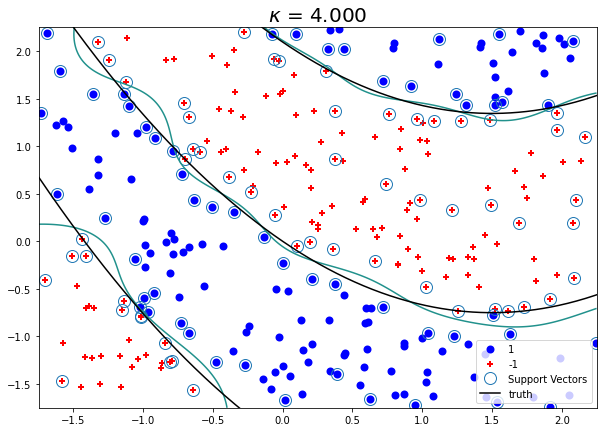

In [11]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 7))

indp = [i for (i, val) in enumerate(y) if val == 1]
indm = [i for (i, val) in enumerate(y) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2, label = "1")
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2, label = "-1")

# Plot support vectors
plt.plot(support_vectors[:, 0], support_vectors[:, 1], marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

# Plot learned dividing lines
plt.contour(XX1, XX2, Z, levels = 0)  # label = "$h_S$"

# Plot true dividing lines
x1 = XX1[:, 0]
plt.plot(x1, (x1**2 - 3*x1 - 2*0)/3, '-k', label = "truth")
plt.plot(x1, (x1**2 - 3*x1 - 2*np.pi)/3, '-k')
plt.plot(x1, (x1**2 - 3*x1 + 2*np.pi)/3, '-k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())

plt.legend()
plt.title(f'$ \kappa $ = {kappa:.3f}', fontsize=20)
plt.show()

#### (2.2) Plot RKHS function

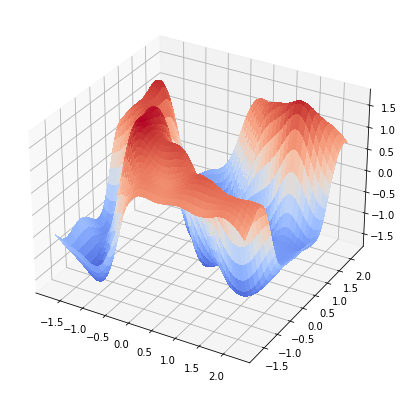

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX1, XX2, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

In [13]:
# Grid point matrice
M = np.c_[XX1.ravel(), XX2.ravel()]
print(M.shape)
print(len(M))
print(M[1][:, None])

(251001, 2)
251001
[[-1.75 ]
 [-1.742]]


In [14]:
# Coordinates of support vectors
SV_supp = support_vectors.T

# Number of support vectors
m_supp = SV_supp.shape[1]
print(m_supp)

print(SV_supp)
print(np.tile(M[1][:, None], (1, m_supp)))

110
[[-1.2421     2.0787    -0.062955   0.96494   -0.64231    1.0293
   1.0875    -0.6459     2.089      1.2551    -1.1528     1.6129
   1.9188     1.2788    -0.22822    0.37319   -1.7024    -0.69811
  -1.4373    -1.3234    -1.4123    -0.71052   -0.024345  -0.79034
  -1.0144     1.9675     0.19717    1.4963     0.7399    -0.84631
  -0.053333   1.9654     2.1024    -0.28025   -1.0183     2.1647
  -1.5803    -1.5081     0.3575    -1.1244     1.521      0.37346
  -1.1354    -0.59374    0.65868    0.099797  -0.3855    -0.67375
   0.98345   -0.80508    1.7298     0.76159    1.6946     1.215
   1.4841     0.30769   -0.63601    2.08      -1.3615     0.0049774
   1.3121    -1.274      1.5071    -0.96362   -1.1013    -0.50514
  -1.1405    -1.7315    -1.0226    -0.34619   -0.27301    1.5348
   1.2288     1.5205    -0.91903    1.6272    -1.599      1.9031
   1.045      0.72067   -1.0564     1.5755    -1.6881     0.20875
   0.44148   -0.079024   2.2463    -1.6196     0.092904   0.71836
   1.5475  

In [15]:
# Learned coefficients
alpha_S = KSVM.dual_coef_.T
print(alpha_S.shape)

b_S = KSVM.intercept_
print(b_S)

kappa_S = kappa
print(kappa_S)

(110, 1)
[0.05582932]
4


In [16]:
# Distance function to the support vectors
def SV_fun(x): return np.sum((SV_supp - np.tile(x, (1, m_supp)))**2, axis=0)[:, None].T

In [17]:
# Learned RKHS function
def kfun_S(x): return np.dot(np.exp(-kappa_S * SV_fun(x)), alpha_S) + b_S

In [18]:
print(SV_fun(M[0][:, None]))
print(kfun_S(M[0][:, None]))
# print(M[0][:, None].T)
print(KSVM.decision_function(M[0][:, None].T))

[[13.60602466 18.42836594 16.26295724 16.5578602   1.26109123  9.33334705
  17.16395594  8.61096463 16.59171217 10.07180135  1.41760964 12.34364985
  14.76736553 18.26325145  7.47457263 14.22175467  1.82069104  7.95160291
   3.23320582 14.98601332  2.67125805 11.32243876 16.24641994  1.16429221
   1.4623426  23.44779466  6.83103452 15.08090338 11.71355132  1.28287146
   7.00538675 22.33819085 19.62491709 17.77767867  1.45646656 23.45193673
   0.11047973  2.60902043  7.22110542 12.10214377 11.78710227 11.3618545
   1.64115412  8.55814226  8.19519587  6.30290212  7.76462204 10.53415806
  12.25196268  1.12097557 13.23074321 15.84321074 15.62658031 13.11849864
  19.5816149  16.74516455  6.02626122 29.56541216 11.00005069  5.40932369
  19.49394505  4.20045877 11.55757122  1.62709234 10.5147761   6.01922208
  11.28328114  9.60786241  1.6425789   6.18549152  2.3793465  10.7937056
   9.44451331 20.80411874  2.14251204 12.01241432 12.55935749 23.4874537
   8.43808574 17.92267909  2.92639502 21.

In [19]:
# Values of the RKHS function on the grid
Z = np.empty((len(M), 1))
for i in range(len(M)):
    Z[i] = kfun_S(M[i][:, None])
print(Z)
print(Z.shape)

[[-0.49652658]
 [-0.50712306]
 [-0.51764908]
 ...
 [ 0.72409955]
 [ 0.71791967]
 [ 0.71148266]]
(251001, 1)


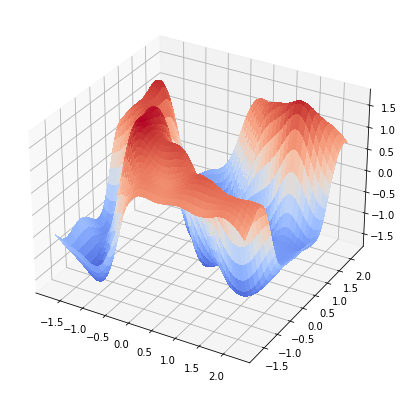

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX1, XX2, np.reshape(Z, (len(x1), len(x1))), cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

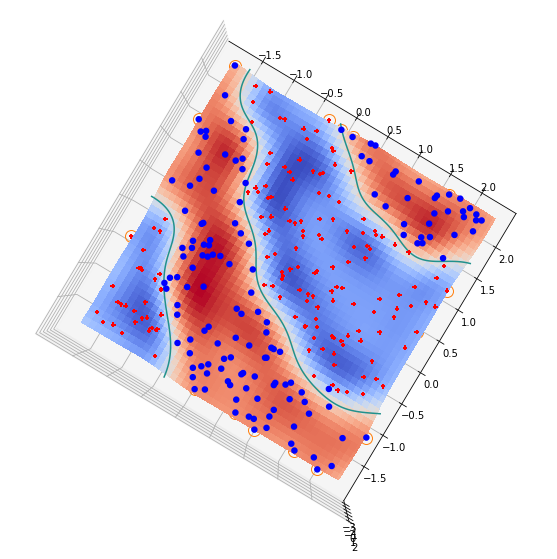

In [21]:
# 2D-Plot

C = np.max(Z)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

ax.plot_surface(XX1, XX2, np.reshape(Z-C, (len(x1), len(x1))), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Plot learned dividing lines
plt.contour(XX1, XX2, np.reshape(Z, (len(x1), len(x1))), levels = 0)  # label = "$h_S$"

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2, label = "1")
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2, label = "-1")

# Plot support vectors
plt.plot(support_vectors[:, 0], support_vectors[:, 1], marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

ax.view_init(90)

plt.show()

#### (3) Kappa study (Gaussian kernel)

In [22]:
# Scaling parameter
kappa = 1/(0.075)**2
# kappa = 1/9

In [23]:
# Create a support vector classifier
KSVM_kappa = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=kappa)

# Learn on the train subset
KSVM_kappa.fit(x.T, y)

SVC(gamma=177.77777777777777)

In [24]:
# Get support vectors
support_vectors_kappa = KSVM_kappa.support_vectors_

In [25]:
# Decision function
Z = KSVM_kappa.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
print('Z', Z)

Z = Z.reshape(XX1.shape)

Z [-0.02624782 -0.02624782 -0.02624783 ... -0.02597048 -0.02605533
 -0.02611723]


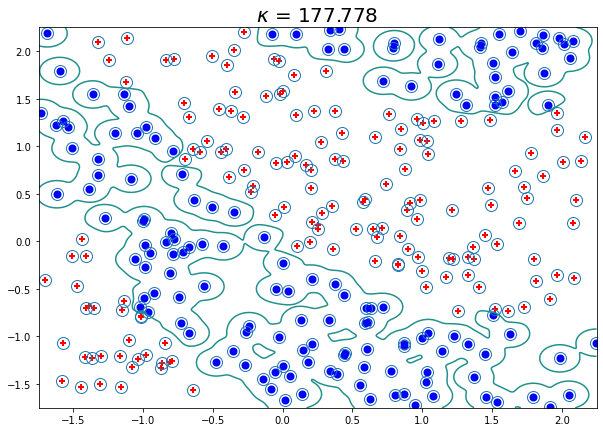

In [26]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 7))

indp = [i for (i, val) in enumerate(y) if val == 1]
indm = [i for (i, val) in enumerate(y) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2, label = "1")
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2, label = "-1")

# Plot support vectors
plt.plot(support_vectors_kappa[:, 0], support_vectors_kappa[:, 1], marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

# Plot learned dividing lines
plt.contour(XX1, XX2, Z, levels = 0)  # label = "$h_S$"

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())

# plt.legend()
plt.title(f'$ \kappa $ = {kappa:.3f}', fontsize=20)
plt.show()

#### (4) Lambda study (Gaussian kernel)

In [27]:
# Lambda for Soft Rule
# lam = 0.5/m;
# lam = 1/(2*m)^2;
lam = 0.035

In [28]:
# Scaling parameter
kappa = 4

In [29]:
# Create a support vector classifier
KSVM_lam = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=kappa)

# Learn on the train subset
KSVM_lam.fit(x.T, y)

SVC(C=0.047619047619047616, gamma=4)

In [30]:
# Get support vectors
support_vectors_lam = KSVM_lam.support_vectors_

In [31]:
# Decision function
Z = KSVM_lam.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
print('Z', Z)

Z = Z.reshape(XX1.shape)

Z [-0.50093941 -0.50401615 -0.50710895 ... -0.10689695 -0.10982343
 -0.11283426]


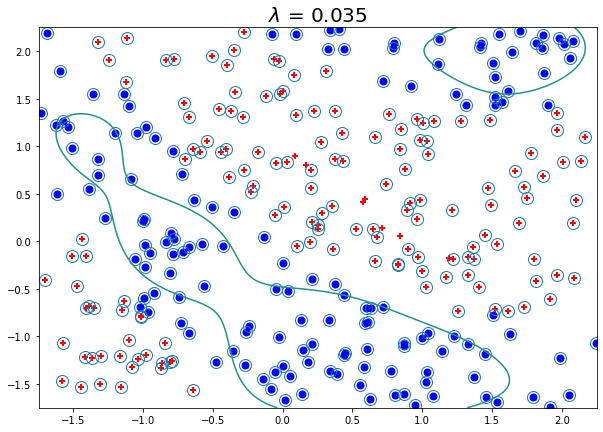

In [32]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 7))

indp = [i for (i, val) in enumerate(y) if val == 1]
indm = [i for (i, val) in enumerate(y) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2, label = "1")
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2, label = "-1")

# Plot support vectors
plt.plot(support_vectors_lam[:, 0], support_vectors_lam[:, 1], marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

# Plot learned dividing lines
plt.contour(XX1, XX2, Z, levels = 0)  # label = "$h_S$"

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())

# plt.legend()
plt.title(f'$ \lambda $ = {lam:.3f}', fontsize=20)
plt.show()

#### (5) Polynomial kernel

In [33]:
# Parameters
lam = 0.5/m
kappa = 1
q = 3

In [34]:
# Create a support vector classifier
KSVM_poly = svm.SVC(C=0.5/m/lam, kernel='poly', gamma=kappa, degree=3, coef0=1)

# Learn on the train subset
KSVM_poly.fit(x.T, y)

SVC(coef0=1, gamma=1, kernel='poly')

###### IMPORTANT

Difference between the formulas in Matlab and Sklearn
See
https://scikit-learn.org/stable/modules/svm.html 1.4.6 Kernel functions
https://de.mathworks.com/help/stats/fitcsvm.html#bt9w6j6_sep_shared-PolynomialOrder


In [35]:
# Get support vectors
support_vectors_poly = KSVM_poly.support_vectors_

In [36]:
# Decision function
Z = KSVM_poly.decision_function(np.c_[XX1.ravel(), XX2.ravel()])
print('Z', Z)

Z = Z.reshape(XX1.shape)

Z [-29.75338999 -29.52882736 -29.30515203 ...  34.75605367  35.10491158
  35.45523534]


#### (5.1) Plot the dividing lines

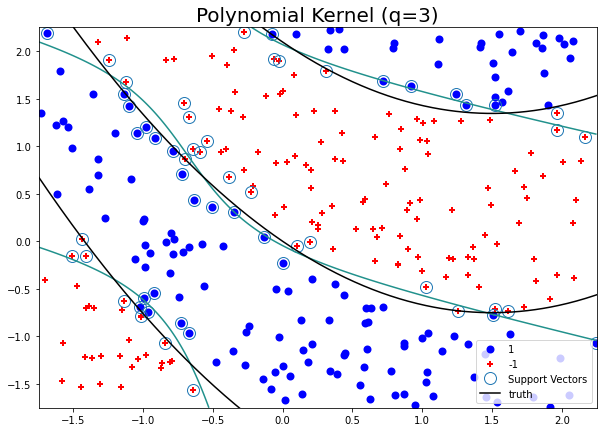

In [37]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 7))

indp = [i for (i, val) in enumerate(y) if val == 1]
indm = [i for (i, val) in enumerate(y) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2, label = "1")
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2, label = "-1")

# Plot support vectors
plt.plot(support_vectors_poly[:, 0], support_vectors_poly[:, 1], marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

# Plot learned dividing lines
plt.contour(XX1, XX2, Z, levels = 0)  # label = "$h_S$"

# Plot true dividing lines
x1 = XX1[:, 0]
plt.plot(x1, (x1**2 - 3*x1 - 2*0)/3, '-k', label = "truth")
plt.plot(x1, (x1**2 - 3*x1 - 2*np.pi)/3, '-k')
plt.plot(x1, (x1**2 - 3*x1 + 2*np.pi)/3, '-k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())

plt.legend()
plt.title(f'Polynomial Kernel (q={q})', fontsize=20)
plt.show()

#### (5.2) Plot RKHS function

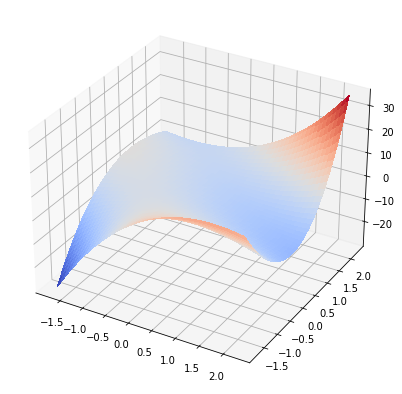

In [38]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX1, XX2, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

In [39]:
# Grid point matrice
M = np.c_[XX1.ravel(), XX2.ravel()]

In [40]:
# Coordinates of support vectors
SV_supp = support_vectors_poly.T

# Number of support vectors
m_supp = SV_supp.shape[1]
print(m_supp)

print(SV_supp)

57
[[-1.2421    -0.062955  -0.64231    1.0293    -0.6459     1.2551
   1.6129    -0.22822   -0.69811   -1.4373    -1.4123    -0.71052
  -0.024345  -1.0144     1.9675     0.19717   -0.84631    1.9654
  -0.28025    2.1647    -1.5081    -0.54418   -1.1244     1.521
  -1.1354    -0.59374    0.099797  -0.3855    -0.67375    0.30769
  -0.63601    0.0049774  1.3121     1.5071    -0.96362   -1.1013
  -0.50514   -1.1405    -1.0226    -0.34619    1.5205    -0.91903
   0.72067   -1.6881    -0.079024   2.2463    -0.78717   -0.73084
   0.92133   -1.0465    -0.98302   -0.99535   -0.91426   -0.72424
  -0.13168   -0.66892    1.2448   ]
 [ 1.9035     1.9129    -1.5653    -0.4816     0.96881   -0.72962
  -0.73287    0.52129    0.86632    0.020713  -0.15087    1.4503
   1.8926    -0.79019    1.3529    -0.0065656 -1.0672     1.1713
   2.2019     1.1008    -0.15297    1.0544     1.6721    -0.70709
  -0.62598    0.93723   -0.052604   0.67956    1.312      1.7871
   0.43753   -0.22377    1.4308    -0.7759   

In [41]:
# Learned coefficients
alpha_S = KSVM_poly.dual_coef_.T
print(alpha_S.shape)

b_S = KSVM_poly.intercept_
print(b_S)

kappa_S = kappa
print(kappa_S)

(57, 1)
[-0.18567907]
1


In [42]:
# Distance function to the support vectors
def SV_fun(x): return np.sum((SV_supp * np.tile(x, (1, m_supp))), axis=0)[:, None].T

In [43]:
# Learned RKHS function
def kfun_S(x): return np.dot((1 + kappa_S * SV_fun(x))**q, alpha_S) + b_S

In [44]:
print(SV_fun(M[0][:, None]))
print(kfun_S(M[0][:, None]))
# print(M[0][:, None].T)
print(KSVM_poly.decision_function(M[0][:, None].T))

[[-1.15745    -3.23740375  3.8633175  -0.958475   -0.5650925  -0.91959
  -1.5400525  -0.5128725  -0.2943675   2.47902725  2.7355475  -1.294615
  -3.26944625  3.1580325  -5.8107     -0.3335577   3.3486425  -5.489225
  -3.3628875  -5.714625    2.9068725  -0.892885   -0.958475   -1.4243425
   3.082415   -0.6011075  -0.08258775 -0.514605   -1.1169375  -3.6658825
   0.34734     0.38288705 -4.800075   -1.2796      2.99124    -0.57015
   0.2467675  -0.7224      3.0054325   0.0755825  -5.16215     2.56207
  -4.2148225  -0.87185    -3.680558   -2.0664     -0.29281     2.77319
  -4.4606275  -0.158375   -0.38619     2.79188    -0.30247     0.0357
   0.154329    2.853725   -4.894925  ]]
[[-29.75338999]]
[-29.75338999]


In [45]:
# Values of the RKHS function on the grid
Z = np.empty((len(M), 1))
for i in range(len(M)):
    Z[i] = kfun_S(M[i][:, None])
print(Z)
print(Z.shape)

[[-29.75338999]
 [-29.52882736]
 [-29.30515203]
 ...
 [ 34.75605367]
 [ 35.10491158]
 [ 35.45523534]]
(251001, 1)


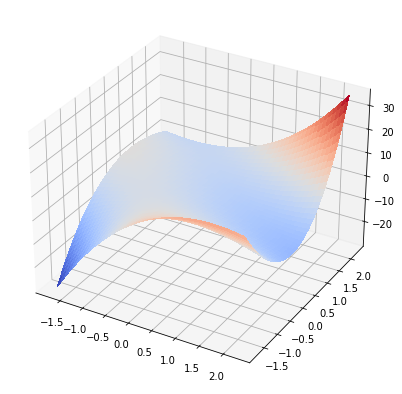

In [46]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX1, XX2, np.reshape(Z, (len(x1), len(x1))), cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()